<h1>Import frameworks</h1>
<p>numpy - numerical calculations</p>
<p>pandas - data analys</p>
<p>matplotlib - graphs and plotting</p>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


<h1>Lamda functions</h1>

In [2]:
ratio = lambda children, elderly, labor: 100 * (children + elderly) / labor
total = lambda children, elderly, labor: children + elderly + labor
fraction = lambda part, total: part / total

<h1>Load population dataFrame</h1>

In [7]:
population = pd.read_csv('swedish_population_by_year_and_sex_1860-2022.csv',  sep=',',)
# Drop sex column, we don't need it
populationNoSex = population.drop(columns=['sex'])

# Set age to numeric
populationNoSex.at[220,'age'] = 110
populationNoSex.at[221,'age'] = 110
# Convert to numeric
populationNoSex['age'] = pd.to_numeric(populationNoSex['age'], errors='coerce', downcast='float')


# Group by age
classes = populationNoSex.groupby(pd.cut(populationNoSex['age'], [-1, 14, 64, 110])).sum()
# Drop age column, we don't need it anymore
classes = classes.drop(columns=['age'])
# Transpose
classesT = classes.transpose()
# Apply lambda functions
classesT['ratio'] = classesT.apply(lambda row: ratio(row.iat[0], row.iat[2], row.iat[1]), axis=1) 
classesT['total'] = classesT.apply(lambda row: total(row.iat[0], row.iat[2], row.iat[1]), axis=1) 
classesT['fraction_children'] = classesT.apply(lambda row: fraction(row.iat[0], row.iat[4]), axis=1) 
classesT['fraction_elderly'] = classesT.apply(lambda row: fraction(row.iat[2], row.iat[4]), axis=1) 
classesT['fraction_dependent'] = classesT.apply(lambda row: fraction(row.iat[0] + row.iat[2], row.iat[4]), axis=1) 

print(classesT.head())
#print(classesT.tail())




age   (-1, 14]  (14, 64]  (64, 110]      ratio      total  fraction_children  \
1860   1292962   2365121     201645  63.193680  3859728.0           0.334988   
1861   1318714   2385678     208106  63.999417  3912498.0           0.337052   
1862   1338720   2405974     212807  64.486441  3957501.0           0.338274   
1863   1362024   2431967     217661  64.955034  4011652.0           0.339517   
1864   1380235   2460997     219574  65.006540  4060806.0           0.339892   

age   fraction_elderly  fraction_dependent  
1860          0.052243            0.387231  
1861          0.053190            0.390242  
1862          0.053773            0.392047  
1863          0.054257            0.393774  
1864          0.054072            0.393963  


<h1>Plot</h1>

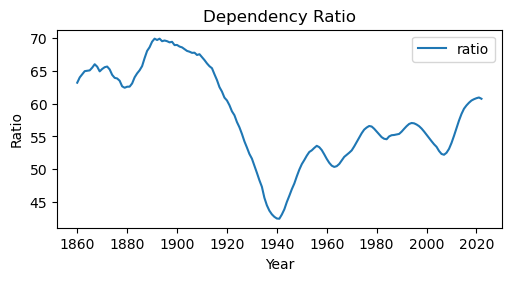

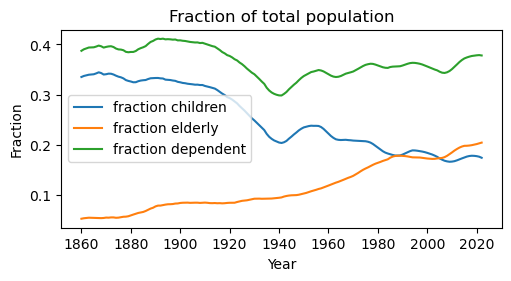

In [9]:
# Convert index to float
years = np.asarray(classesT.index.values, float)

# Plot ratio
fig1, ax1 = pyplot.subplots(figsize=(5, 2.7), layout='constrained')
ax1.plot(years, classesT['ratio'], label='ratio')
ax1.set_xlabel('Year')  # Add an x-label to the axes.
ax1.set_ylabel('Ratio')  # Add a y-label to the axes.
ax1.set_title("Dependency Ratio")  # Add a title to the axes.
ax1.legend()

# Plot fractions
fig2, ax2 = pyplot.subplots(figsize=(5, 2.7), layout='constrained')
ax2.plot(years, classesT['fraction_children'], label='fraction children')
ax2.plot(years, classesT['fraction_elderly'], label='fraction elderly')
ax2.plot(years, classesT['fraction_dependent'], label='fraction dependent')
ax2.set_xlabel('Year')  # Add an x-label to the axes.
ax2.set_ylabel('Fraction')  # Add a y-label to the axes.
ax2.set_title("Fraction of total population")  # Add a title to the axes.
ax2.legend()
